
o Implement a two-class neural network with a hidden layer
<br>o Implement forward and backward propagation
<br>o Compute the cross-entropy loss


In [77]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting library
%matplotlib inline


In [78]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape,x_test.shape, y_test.shape)


# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


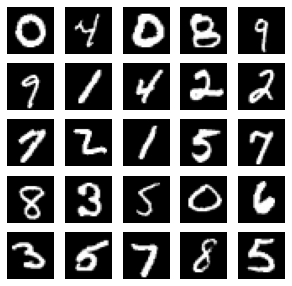

In [79]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')


***Data Normalization***

In [80]:
x_train[0].max()# check the max value of one pixel in training dataset
x_test[0].max()

255

In [81]:
x_train=x_train/255
x_test=x_test/255

In [82]:
x_train[0]# we can see that after normalization the array ranges from 0 to 1

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

***Data preprocessing***


In [83]:
x_train_flat=x_train.reshape(len(x_train),28*28)
x_test_flat=x_test.reshape(len(x_test),28*28)
print(x_train_flat.shape)

(60000, 784)


In [84]:
from keras.models import Sequential
from keras.layers import Dense 

model = Sequential()
model.add(Dense(500, input_shape=(784,), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 500)               392500    
                                                                 
 dense_31 (Dense)            (None, 100)               50100     
                                                                 
 dense_32 (Dense)            (None, 100)               10100     
                                                                 
 dense_33 (Dense)            (None, 100)               10100     
                                                                 
 dense_34 (Dense)            (None, 10)                1010      
                                                                 
Total params: 463,810
Trainable params: 463,810
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [88]:
model.fit(x_train_flat,y_train,epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2070 - accuracy: 0.9381
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0966 - accuracy: 0.9706
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0664 - accuracy: 0.9798
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0543 - accuracy: 0.9835
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0432 - accuracy: 0.9870
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0374 - accuracy: 0.9883
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0330 - accuracy: 0.9901
Epoch 8/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0280 - accuracy: 0.9914
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0251 - accuracy: 0.9925
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.022

In [90]:
loss,acc=model.evaluate(x_test_flat,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9820


In [91]:
print("\nTest accuracy: %.1f%%" % (100.0 * acc))


Test accuracy: 98.2%
